In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

print(tf.__version__)


2.16.2


In [76]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_gen = ImageDataGenerator(rescale=1./255)


train_data = train_gen.flow_from_directory(
    'balanced_train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    'balanced_test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 306 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [77]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
# train
EPOCHS = 35
# saved accuracies
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data
)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5557 - loss: 1.1643 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 871ms/step - accuracy: 0.6774 - loss: 0.9022 - val_accuracy: 0.5000 - val_loss: 0.7244
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 947ms/step - accuracy: 0.6055 - loss: 0.8155 - val_accuracy: 0.5000 - val_loss: 0.7428
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6578 - loss: 0.7413 - val_accuracy: 0.5000 - val_loss: 0.8619
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 961ms/step - accuracy: 0.6021 - loss: 0.7615 - val_accuracy: 0.5000 - val_loss: 0.8456


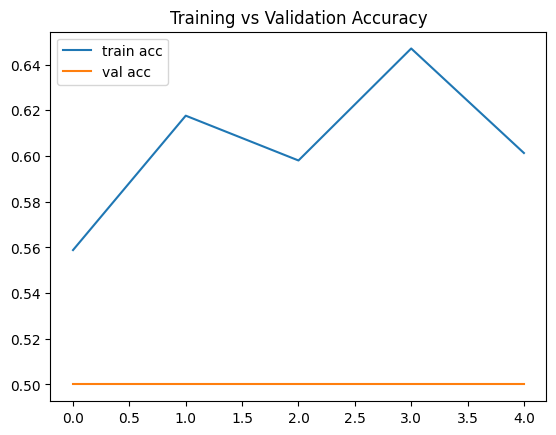

In [80]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [81]:
loss, acc = model.evaluate(test_data)
print(f"val Accuracy: {acc * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.2350 - loss: 1.1604
val Accuracy: 50.00%
